In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("winemag-data-130k-v2.csv.zip")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df = df.drop(columns=["Unnamed: 0", "designation", "taster_name", "taster_twitter_handle"])

In [4]:
df.head()

,country,description,points,price,province,region_1,region_2,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
df.shape

(129971, 10)

In [6]:
df.nunique()

country            43
description    119955
points             21
price             390
province          425
region_1         1229
region_2           17
title          118840
variety           707
winery          16757
dtype: int64

In [7]:
df.isna().sum()

country           63
description        0
points             0
price           8996
province          63
region_1       21247
region_2       79460
title              0
variety            1
winery             0
dtype: int64

In [8]:
df.dropna(subset=['country', 'variety'], inplace=True)

In [9]:
df.isna().sum()

country            0
description        0
points             0
price           8992
province           0
region_1       21183
region_2       79396
title              0
variety            0
winery             0
dtype: int64

In [10]:
df.drop(columns=["region_2"], inplace=True)

In [11]:
df["region_1"] = df["region_1"].fillna("")
df["price"] = df["price"].fillna(df["price"].median())

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(119928, 9)

In [14]:
df.isna().sum()

country        0
description    0
points         0
price          0
province       0
region_1       0
title          0
variety        0
winery         0
dtype: int64

In [15]:
df["country"].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 'Turkey', 'Czech Republic', 'Slovenia', 'Luxembourg',
       'Croatia', 'Georgia', 'Uruguay', 'England', 'Lebanon', 'Serbia',
       'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria',
       'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina',
       'Ukraine', 'Slovakia', 'Macedonia', 'China', 'Egypt'], dtype=object)

In [16]:
df.isna().sum()

country        0
description    0
points         0
price          0
province       0
region_1       0
title          0
variety        0
winery         0
dtype: int64

In [17]:
df.shape

(119928, 9)

In [18]:
df.reset_index(inplace=True, drop=True)
df

,country,description,points,price,province,region_1,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,25.0,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...
119923,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
119924,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
119925,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
119926,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [19]:
df.to_csv("wine.csv", index_label="wine_index")

<AxesSubplot: xlabel='price', ylabel='Density'>

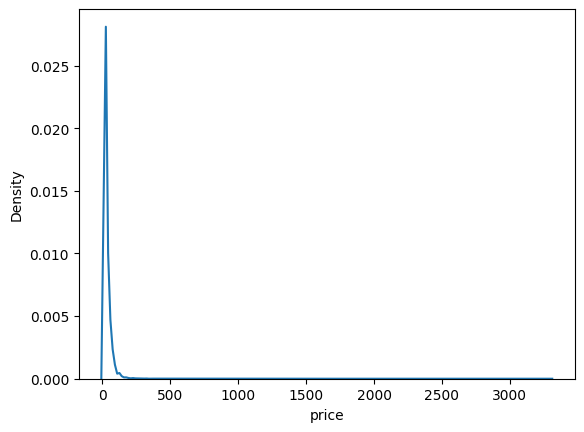

In [20]:
sns.kdeplot(df["price"], )

In [21]:
df.nunique()

country            43
description    119895
points             21
price             390
province          425
region_1         1230
title          118780
variety           701
winery          16745
dtype: int64

In [79]:
df.drop_duplicates(subset=["title"], inplace=True)

In [80]:
df.nunique()

country            43
description    118747
points             21
price             386
province          425
region_1         1230
title          118780
variety           701
winery          16745
dtype: int64

In [82]:
df.shape

(118780, 9)

In [83]:
sub_df = df.drop(columns=['winery', 'region_1'])

In [84]:
sub_df.head()

,country,description,points,price,province,title,variety
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,25.0,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir


In [86]:
sub_df.set_index('title', inplace=True)
sub_df.head()

,country,description,points,price,province,variety
title,,,,,,
Nicosia 2013 Vulkà Bianco (Etna),Italy,"Aromas include tropical fruit, broom, brimston...",87,25.0,Sicily & Sardinia,White Blend
Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Portuguese Red
Rainstorm 2013 Pinot Gris (Willamette Valley),US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Pinot Gris
St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Riesling
Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Pinot Noir


In [87]:
sub_df.shape

(118780, 6)

In [91]:
dummies = pd.get_dummies(sub_df[["country", "province", "variety"]])
df_dummies = sub_df.join(dummies).drop(columns=["country", "province", "variety"])
df_dummies.sample(5)

,description,points,price,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,...,variety_Yapincak,variety_Zelen,variety_Zibibbo,variety_Zierfandler,variety_Zierfandler-Rotgipfler,variety_Zinfandel,variety_Zlahtina,variety_Zweigelt,variety_Çalkarası,variety_Žilavka
title,,,,,,,,,,,,,,,,,,,,,
L. Tramier & Fils 2012 Bourgogne Hautes Côtes de Beaune,From the slopes high on the hillside above Bea...,86,25.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Domaine de la Foliette 2015 Vieilles Vignes Clos de la Fontaine Sur Lie (Muscadet Sèvre et Maine),A smooth and creamy wine that is also full of ...,87,18.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hubert Meyer 2010 Riesling (Alsace),"Already showing some maturity, this is a finel...",88,12.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adega Cooperativa de Borba 2002 Garrafeira Red (Alentejo),Only the second garrafeira (the name means spe...,90,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Goat Bubbles 2014 Solomon Hills Vineyard Rosé Sparkling (Santa Maria Valley),This sparkler from a coveted property on the w...,91,42.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df_dummies.shape

(118780, 1172)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=100, stop_words='english')
X = vectorizer.fit_transform(df_dummies['description'])

In [94]:
X.shape

(118780, 100)

In [95]:
df_description = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=df_dummies.index)

In [96]:
df_description.head(5)

,acidity,age,aging,alongside,apple,aromas,balance,balanced,berry,bit,...,texture,toast,tobacco,touch,vanilla,vineyard,white,wine,wood,years
title,,,,,,,,,,,,,,,,,,,,,
Nicosia 2013 Vulkà Bianco (Etna),1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Quinta dos Avidagos 2011 Avidagos Red (Douro),1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
Rainstorm 2013 Pinot Gris (Willamette Valley),1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [97]:
df_final = df_dummies.join(df_description).drop(columns=["description"])
df_final.head()

,points,price,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,...,texture,toast,tobacco,touch,vanilla,vineyard,white,wine,wood,years
title,,,,,,,,,,,,,,,,,,,,,
Nicosia 2013 Vulkà Bianco (Etna),87,25.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Quinta dos Avidagos 2011 Avidagos Red (Douro),87,15.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Rainstorm 2013 Pinot Gris (Willamette Valley),87,14.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),87,13.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),87,65.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [98]:
df_final.shape

(118780, 1271)

In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_final[["points", "price"]])
df_final[["points", "price"]] = scaler.transform(df_final[["points", "price"]])


In [104]:
df_final.sample(5)

,points,price,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,...,texture,toast,tobacco,touch,vanilla,vineyard,white,wine,wood,years
title,,,,,,,,,,,,,,,,,,,,,
Lane Tanner 2006 Pinot Noir (Santa Barbara County),0.30,0.006675,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Di Meo 2005 C (Coda di Volpe d'Irpinia),0.25,0.003034,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Domaine Faiveley 2010 Clos des Cortons Faiveley (Corton),0.70,0.064017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
Ferrari-Carano 2015 Fumé Blanc (Sonoma County),0.50,0.003034,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Villa Andriana 2013 Muscat Canelli (Knights Valley),0.20,0.004854,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [105]:
df_final.to_csv("wine_preprocessing.csv", index_label="wine_index")

In [150]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, metric='cosine', n_jobs=-1)
nn.fit(df_final)

NearestNeighbors(metric='cosine', n_jobs=-1)

In [151]:
df_final.iloc[0, :]

points               0.350000
price                0.006371
country_Argentina    0.000000
country_Armenia      0.000000
country_Australia    0.000000
                       ...   
vineyard             0.000000
white                0.000000
wine                 0.000000
wood                 0.000000
years                0.000000
Name: Nicosia 2013 Vulkà Bianco  (Etna), Length: 1271, dtype: float64

In [152]:
distances, indexes = nn.kneighbors(np.array(df_final.iloc[0, :]).reshape(1, -1), n_neighbors=df_final.shape[0])

/Users/benjamindrai/miniforge3/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [153]:
nn.kneighbors(df_final, n_neighbors=20)

KeyboardInterrupt: 

In [124]:
df.iloc[0, :]

country                                                    Italy
description    Aromas include tropical fruit, broom, brimston...
points                                                        87
price                                                       25.0
province                                       Sicily & Sardinia
region_1                                                    Etna
title                          Nicosia 2013 Vulkà Bianco  (Etna)
variety                                              White Blend
winery                                                   Nicosia
Name: 0, dtype: object

In [135]:
df.iloc[101380, :]

country                                                Argentina
description    Rubbery on the nose, then sharp in the mouth, ...
points                                                        80
price                                                        8.0
province                                        Mendoza Province
region_1                                                 Mendoza
title                       Finca El Origen 2010 Syrah (Mendoza)
variety                                                    Syrah
winery                                           Finca El Origen
Name: 102262, dtype: object